# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [1]:
import pickle
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [5]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1


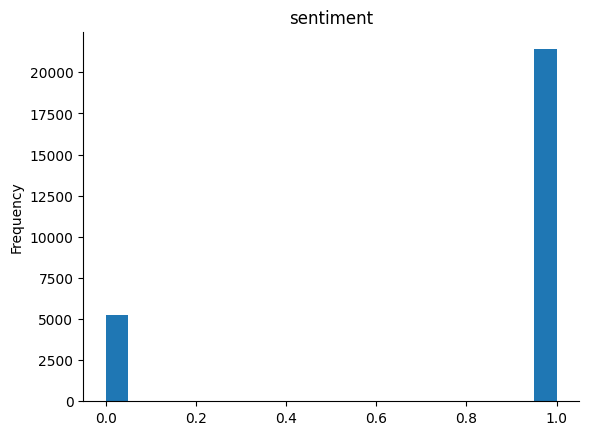

In [6]:
# @title sentiment

from matplotlib import pyplot as plt
data['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

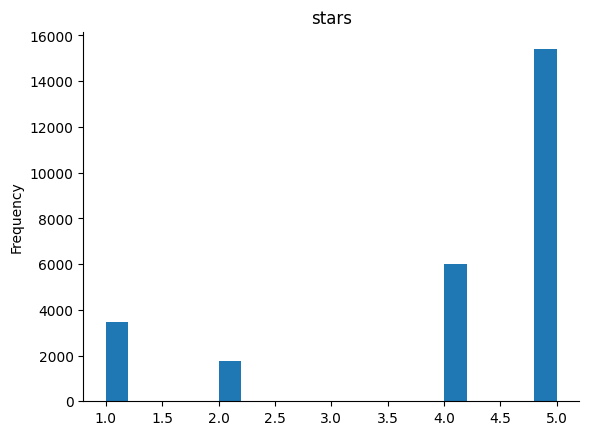

In [13]:
# @title stars

from matplotlib import pyplot as plt
data['stars'].plot(kind='hist', bins=20, title='stars')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:

reviews = data['text']

cleaned_reviews = [review.translate(str.maketrans('', '', string.punctuation)).lower() for review in reviews] # remove punctuations, convert to lowercase

tokenized_reviews = [word_tokenize(review) for review in cleaned_reviews] # tokenize

stop_words = set(stopwords.words('english'))
filtered_reviews = [[word for word in review if word not in stop_words] for review in tokenized_reviews] # for stop words

porter = PorterStemmer()
stemmed_reviews = [[porter.stem(word) for word in review] for review in filtered_reviews] # stemming

print(reviews[0], stemmed_reviews[0])

Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs. ['total', 'bill', 'horribl', 'servic', '8g', 'crook', 'actual', 'nerv', 'charg', 'us', '69', '3', 'pill', 'check', 'onlin', 'pill', '19', 'cent', 'avoid', 'hospit', 'er', 'cost']


In [15]:
stemmed_reviews = [' '.join(x) for x in stemmed_reviews]
stemmed_reviews[0]

'total bill horribl servic 8g crook actual nerv charg us 69 3 pill check onlin pill 19 cent avoid hospit er cost'

In [16]:
X = stemmed_reviews
y = data['stars']

train_index = train_test_index_dict['train_index']
test_index = train_test_index_dict['test_index']
X_train = [X[i] for i in train_index]
X_test = [X[i] for i in test_index]
y_train = y[train_index]
y_test = y[test_index]

In [17]:
X_train[0], y_train[0],  reviews[train_index[0]]

('twice time staff super friendli help pina colada smoothi absolut delici look forward tri item menu',
 1.0,
 'I have been here twice.  Both times the staff was super friendly and helpful!  The pina colada smoothie is absolutely delicious!!! Looking forward to trying other items on the menu.')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

multinomial_classifier = MultinomialNB()
multinomial_classifier.fit(X_train_bow, y_train)

y_pred = multinomial_classifier.predict(X_test_bow)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.75      0.74      1149
         2.0       0.46      0.09      0.15       587
         4.0       0.48      0.49      0.49      1981
         5.0       0.79      0.85      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799



In [ ]:
print(X_test_bow[0]), print(X_test[0])

  (0, 1892)	1
  (0, 2918)	1
  (0, 5806)	1
  (0, 7754)	1
  (0, 8088)	1
  (0, 8707)	1
  (0, 13701)	2
  (0, 13900)	1
  (0, 14709)	1
  (0, 15777)	1
  (0, 15900)	1
  (0, 19260)	1
awesom place brekki great servic downsid wait get seat place popular highli recommend


(None, None)

In [ ]:
word_at_index_13701 = list(count_vectorizer.vocabulary_.keys())[list(count_vectorizer.vocabulary_.values()).index(13701)]
print("Word at index 13701:", word_at_index_13701)

Word at index 13701: place


In [ ]:
multinomial_classifier.predict(X_test_bow[0])

array([5.])

In [ ]:
print(X_test[77])

compani absolut horribl complet crook tell 39 fee come show ask 39 spot put ball valv outsid hous made seem would take hour two 10 minut later done charg 195 compani said day servic highli train technician total bullshit never ever ever use compani


In [ ]:
multinomial_classifier.predict(X_test_bow[77])

array([1.])

In [ ]:
y_test.shape, y_pred.shape

((8799,), (8799,))

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred_2 = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

         1.0       0.92      0.11      0.20      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.52      0.01      0.02      1981
         5.0       0.59      1.00      0.74      5082

    accuracy                           0.59      8799
   macro avg       0.51      0.28      0.24      8799
weighted avg       0.58      0.59      0.46      8799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(X_test_tfidf[0]), print(X_test[0])

  (0, 19260)	0.20245496715894556
  (0, 15900)	0.13198289337608637
  (0, 15777)	0.26536747072081357
  (0, 14709)	0.1771929477934792
  (0, 13900)	0.38477224734671733
  (0, 13701)	0.25173097530429056
  (0, 8707)	0.22549834024428
  (0, 8088)	0.1225675426380129
  (0, 7754)	0.16150955890336413
  (0, 5806)	0.4098173495315867
  (0, 2918)	0.5696576299936187
  (0, 1892)	0.20961723126428153
awesom place brekki great servic downsid wait get seat place popular highli recommend


(None, None)

In [ ]:
classifier.predict(X_test_tfidf[0]), classifier.predict(X_test_tfidf[77])

(array([5.]), array([5.]))

In [ ]:
classifier.predict(X_test_tfidf[1])

array([5.])

In [ ]:
X_test[77]

'compani absolut horribl complet crook tell 39 fee come show ask 39 spot put ball valv outsid hous made seem would take hour two 10 minut later done charg 195 compani said day servic highli train technician total bullshit never ever ever use compani'

In [ ]:
y_test.value_counts()[5]/len(y_test)

0.5775656324582339

In [ ]:
accuracy_mnb = accuracy_score(y_test, y_pred)
accuracy_tvf = accuracy_score(y_test, y_pred_2)

In [ ]:
accuracy_mnb, accuracy_tvf

(0.7036026821229685, 0.5933628821456983)

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [8]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [9]:
embeds

array([[ 0.50699836,  0.61128891, -0.2719104 , ...,  1.0390445 ,
        -0.80041009,  0.73497975],
       [-0.02217656, -0.1527285 , -0.55813098, ...,  0.18087101,
         0.16279726, -0.41220728],
       [ 0.52932245,  0.60723621, -0.25953016, ...,  1.0670861 ,
        -0.75681108,  0.69999683],
       ...,
       [-0.05420208, -0.14062414, -0.55579591, ...,  0.12184423,
         0.12340328, -0.31265116],
       [-0.02863726, -0.14980018, -0.55721784, ...,  0.17685497,
         0.16171496, -0.39407209],
       [-0.02447684, -0.15692814, -0.55817062, ...,  0.17620397,
         0.16273451, -0.39889568]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

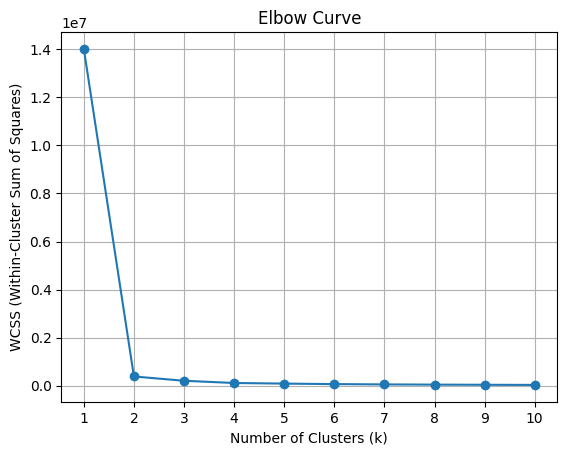

In [10]:
wcss = []
models = []
for k in range(10):
    model = KMeans(n_clusters=k + 1, random_state=42)
    model.fit(embeds)
    wcss.append(model.inertia_)
    models.append(model)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [12]:
wcss_plus = []
models_plus = []
for k in range(10):
    model = KMeans(n_clusters=k + 1,init='k-means++', random_state=42)
    model.fit(embeds)
    wcss_plus.append(model.inertia_)
    models_plus.append(model)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

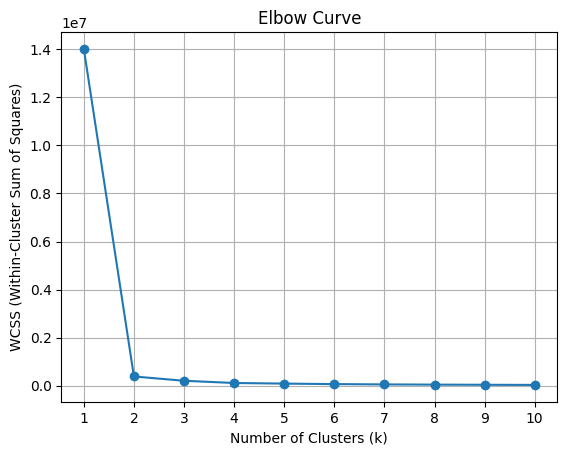

In [13]:
plt.plot(range(1, 11), wcss_plus, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [18]:
X_train[0], y_train[train_index[0]]

('twice time staff super friendli help pina colada smoothi absolut delici look forward tri item menu',
 5.0)

In [19]:
len(models[0].labels_), len(embeds)

(26661, 26661)

In [20]:
len(data['stars'])

26661

In [21]:
true_labels = data['stars'].values

In [22]:
def calculate_purity(true_labels, pred_labels):
    unique_clusters = np.unique(pred_labels)
    unique_classes = np.unique(true_labels)
    num_samples = len(true_labels)

    total_correct = 0
    for cluster in unique_clusters:
        cluster_indices = np.where(pred_labels == cluster)[0]
        cluster_labels = true_labels[cluster_indices]

        class_counts = [np.sum(cluster_labels == cls) for cls in unique_classes]

        majority_class_index = np.argmax(class_counts)

        total_correct += class_counts[majority_class_index]

    purity = total_correct / num_samples
    return purity

def calculate_entropy(true_labels, pred_labels):
    num_samples = len(true_labels)
    contingency_matrix = np.zeros((len(np.unique(pred_labels)), len(np.unique(true_labels))))

    for i, cluster in enumerate(np.unique(pred_labels)):
        for j, cls in enumerate(np.unique(true_labels)):
            contingency_matrix[i, j] = np.sum((pred_labels == cluster) & (true_labels == cls))

    eps = np.finfo(float).eps
    cluster_probs = np.sum(contingency_matrix, axis=1) / num_samples
    class_probs = np.sum(contingency_matrix, axis=0) / num_samples
    cluster_entropy = -np.sum(cluster_probs * np.log(cluster_probs + eps))
    class_entropy = -np.sum(class_probs * np.log(class_probs + eps))
    return cluster_entropy, class_entropy

def calculate_rand_index(true_labels, pred_labels):

    n = len(true_labels)
    tp = sum((true_labels[i] == true_labels[j]) and (pred_labels[i] == pred_labels[j]) for i in range(n) for j in range(i+1, n))
    tn = sum((true_labels[i] != true_labels[j]) and (pred_labels[i] != pred_labels[j]) for i in range(n) for j in range(i+1, n))
    fp = sum((true_labels[i] != true_labels[j]) and (pred_labels[i] == pred_labels[j]) for i in range(n) for j in range(i+1, n))
    fn = sum((true_labels[i] == true_labels[j]) and (pred_labels[i] != pred_labels[j]) for i in range(n) for j in range(i+1, n))
    rand_index = (tp + tn) / (tp + tn + fp + fn)

    return rand_index


def mutual_information(true_labels, predicted_labels):
    N = float(true_labels.shape[0])
    mutual_info = 0.0
    for true_label in np.unique(true_labels):
        for pred_label in np.unique(predicted_labels):
            intersection = np.logical_and(true_labels == true_label, predicted_labels == pred_label).sum()
            if intersection > 0:
                size_true_label = (true_labels == true_label).sum()
                size_pred_label = (predicted_labels == pred_label).sum()
                mutual_info += (intersection / N) * np.log((N * intersection) / (size_true_label * size_pred_label))
    return mutual_info

def clustering_entropy(labels):
    N = float(labels.shape[0])
    entropy_val = 0.0
    for label in np.unique(labels):
        cluster_size = (labels == label).sum()
        p_cluster = cluster_size / N
        entropy_val -= p_cluster * np.log(p_cluster)
    return entropy_val

def normalized_mutual_information(true_labels, predicted_labels):
    mi = mutual_information(true_labels, predicted_labels)
    return 2 * mi / (clustering_entropy(true_labels) + clustering_entropy(predicted_labels))


In [23]:
calculate_purity(true_labels, models[0].labels_), calculate_purity(true_labels, models[2].labels_), calculate_purity(true_labels, models[5].labels_)

(0.5775102209219459, 0.70683770301189, 0.7113761674355801)

In [24]:
normalized_mutual_information(true_labels, models[0].labels_),normalized_mutual_information(true_labels, models[2].labels_), normalized_mutual_information(true_labels, models[5].labels_)

(0.0, 0.5299522788101331, 0.4574108161841284)

In [25]:
calculate_rand_index(true_labels, models[0].labels_)

0.40569768581449966

In [30]:
def cluster_report(true_labels, pred_labels):
    purity = calculate_purity(true_labels, pred_labels)
    rand_index = calculate_rand_index(true_labels, pred_labels)
    nmi = normalized_mutual_information(true_labels, pred_labels)

    print("Purity:", purity)
    print("Rand Index:", rand_index)
    print("Normalized Mutual Information:", nmi)



In [27]:
cluster_report(true_labels, models[2].labels_)

Purity: 0.70683770301189
Normalized Mutual Information: 0.5299522788101331


In [31]:
cluster_report(true_labels, models[5].labels_)

Purity: 0.7113761674355801
Rand Index: 0.7280273539747601
Normalized Mutual Information: 0.4574108161841284
